<a href="https://colab.research.google.com/github/Kunaltembhare003/EDA/blob/main/Copy_of_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [8]:
pip install pyshp

     |████████████████████████████████| 219 kB 4.8 MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37324 sha256=c7fec4f76e04434fe90f4af24326a54937d4ede69f0a0f7958d5ab57069ea9b4
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built pyshp


In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import shapefile as shp

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
working_path = '/content/drive/MyDrive/alma_better/capstone_project/EDA/'


In [5]:
df = pd.read_csv(working_path+'Airbnb_NYC_2019.csv')

In [51]:
df.fillna(0,inplace=True)

In [52]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0,0.0,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0,0.0,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,0.0,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0,0.0,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,0,0.0,1,23


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

number of neighboorhood group are listed 

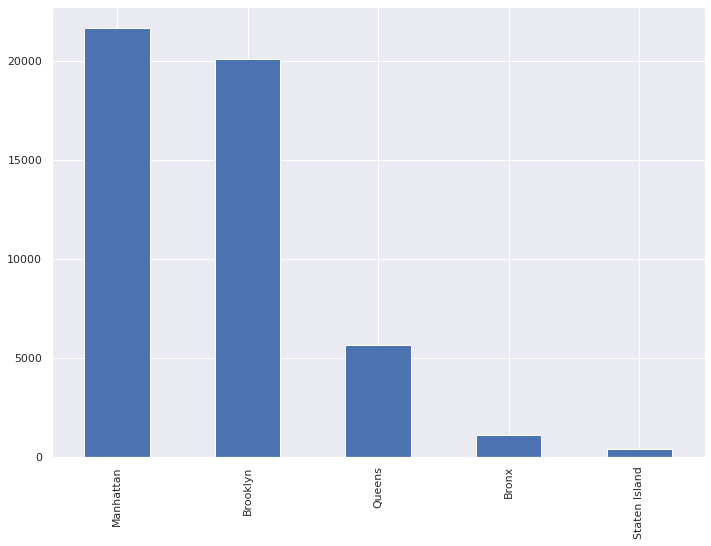

In [67]:
df['neighbourhood_group'].value_counts().plot(kind='bar')

In [69]:
df.groupby('neighbourhood_group')['price'].max().reset_index()

,neighbourhood_group,price
0,Bronx,2500
1,Brooklyn,10000
2,Manhattan,10000
3,Queens,10000
4,Staten Island,5000


In [70]:
df[df['price']==10000]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0
29238,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,0,0.00,1,83


minimum and maximum price neighbourhood wise

In [71]:
nei_max = df.groupby(['neighbourhood_group','neighbourhood'])['price'].max().reset_index()
nei_min =df.groupby(['neighbourhood_group','neighbourhood'])['price'].min().reset_index()
nei_avg =df.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().reset_index()

find out number of airbnb acomodation facility at neighboorhood of **manhattan** 

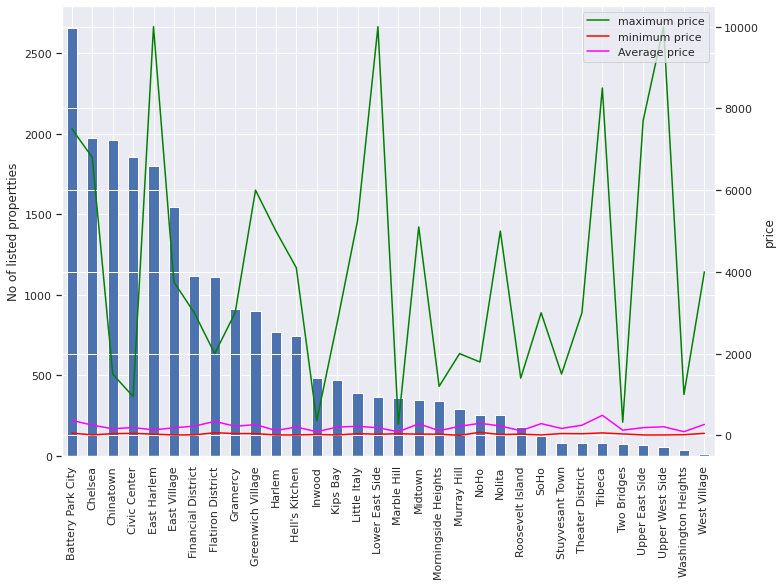

In [72]:
man_data = df[df['neighbourhood_group'] == 'Manhattan']
sns.set(rc={'figure.figsize':(11.7,8.27)}) #set figure size
man_ax1 = man_data['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties')
ax2 = man_ax1.twinx() # create axis 2 for prrice listing
sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=nei_max[nei_max['neighbourhood_group' ]== 'Manhattan'])
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=nei_min[nei_min['neighbourhood_group' ]== 'Manhattan'])
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Average price',
             data=nei_avg[nei_avg['neighbourhood_group' ]== 'Manhattan'])
plt.legend(loc='upper right') #set legend position
plt.show()



find out number of airbnb acomodation facility at neighboorhood of **manhattan** depend on room  type **private room**


---



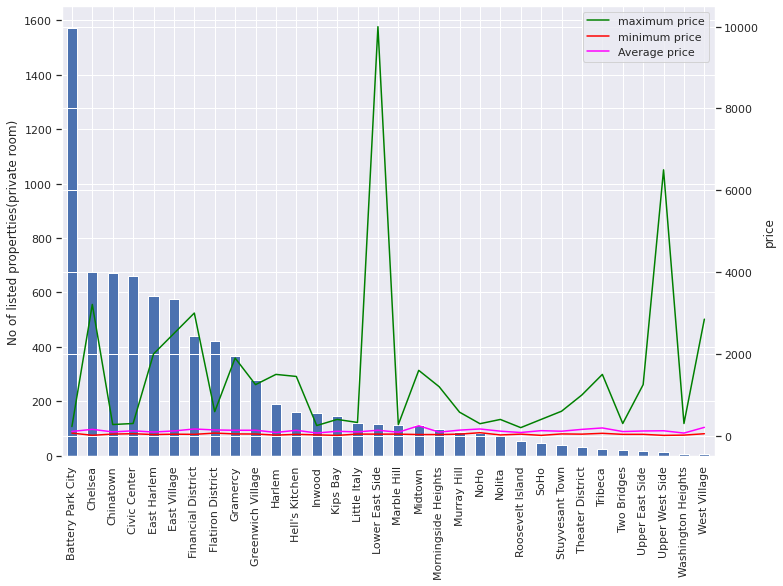

In [86]:
pri_room = man_data[man_data['room_type']=='Private room']
man_ax1 = pri_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(private room)')

ax2 = man_ax1.twinx() # create axis 2 for prrice listing
sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=pri_room.groupby(['neighbourhood'])['price'].max().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=pri_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Average price',
             data=pri_room.groupby(['neighbourhood'])['price'].mean().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()


find out number of airbnb acomodation facility at neighboorhood of **manhattan** depend on room  type **Entire home/apt**

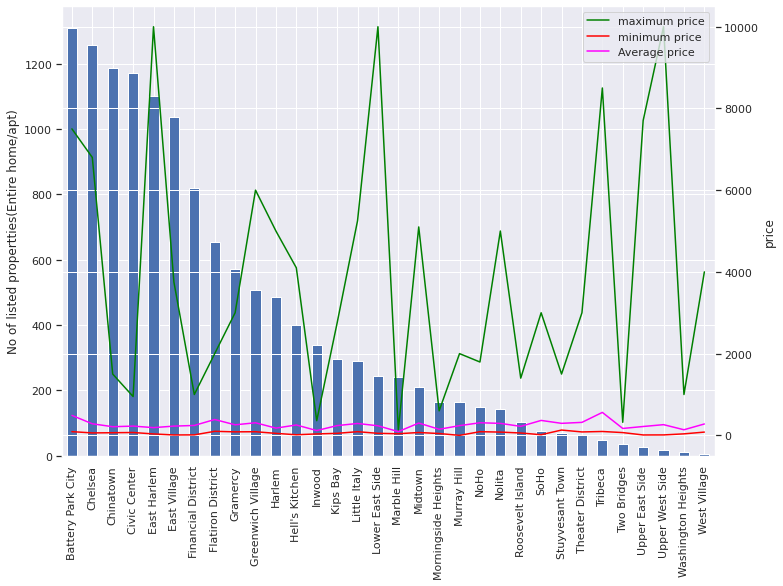

In [87]:
apt_room = man_data[man_data['room_type']=='Entire home/apt']
man_ax1 = apt_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(Entire home/apt)')

ax2 = man_ax1.twinx() # create axis 2 for prrice listing
sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=apt_room.groupby(['neighbourhood'])['price'].max().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=apt_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Average price',
             data=apt_room.groupby(['neighbourhood'])['price'].mean().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()

find out number of airbnb acomodation facility at neighboorhood of **manhattan** depend on room  type **Shared room**

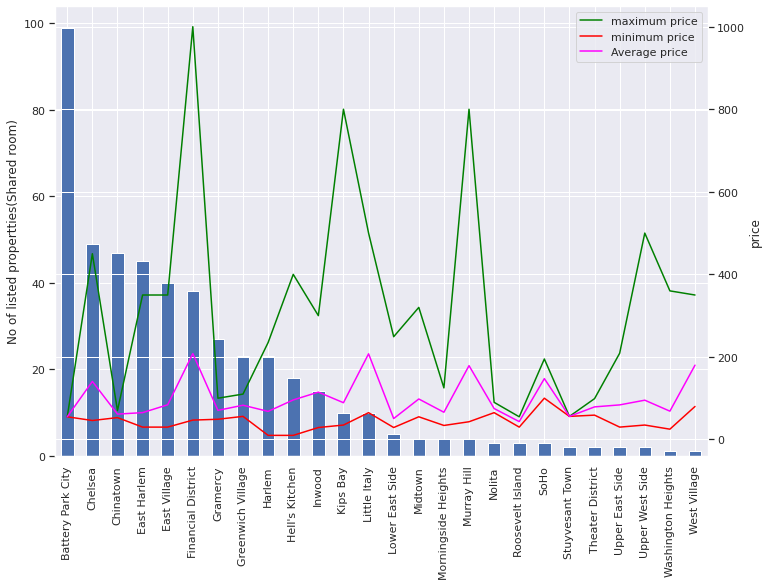

In [89]:
shr_room = man_data[man_data['room_type']=='Shared room']
man_ax1 = shr_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(Shared room)')

ax2 = man_ax1.twinx() # create axis 2 for prrice listing
sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=shr_room.groupby(['neighbourhood'])['price'].max().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=shr_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Average price',
             data=shr_room.groupby(['neighbourhood'])['price'].mean().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()

find out number of airbnb acomodation facility at neighboorhood of **Brooklyn** 

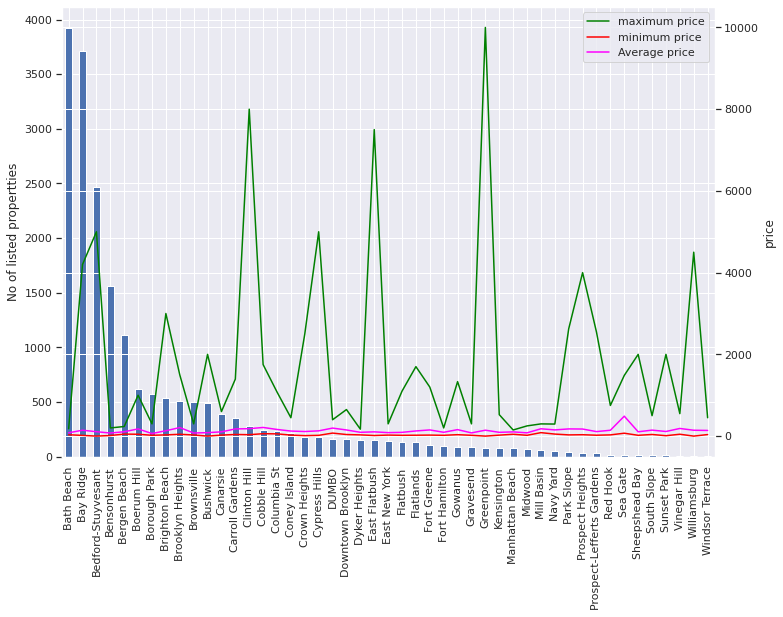

In [74]:
brooklyn_data = df[df['neighbourhood_group'] == 'Brooklyn']
sns.set(rc={'figure.figsize':(11.7,8.27)})
bro_ax1 =brooklyn_data['neighbourhood'].value_counts().plot(kind="bar",
                                              ylabel='No of listed propertties')
ax2 = bro_ax1.twinx() # create axis 2 for prrice listing
sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=nei_max[nei_max['neighbourhood_group' ]== 'Brooklyn'])
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=nei_min[nei_min['neighbourhood_group' ]== 'Brooklyn'])
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Average price',
             data=nei_avg[nei_avg['neighbourhood_group' ]== 'Brooklyn'])
plt.legend(loc='upper right') #set legend position
plt.show()

find out number of airbnb acomodation facility at neighboorhood of **Brooklyn** depend on room  type **private room**

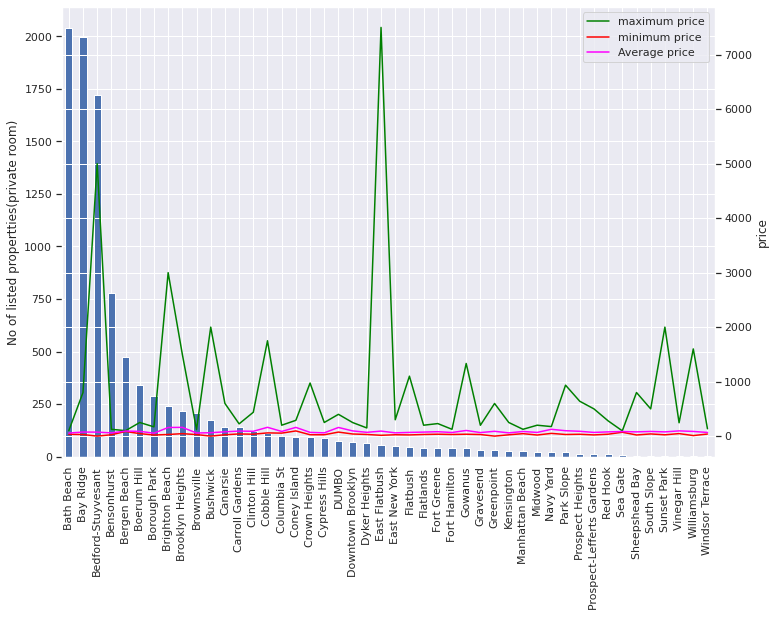

In [90]:
b_pri_room = brooklyn_data[brooklyn_data['room_type']=='Private room']
bro_ax1 = b_pri_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(private room)')

ax2 = bro_ax1.twinx() # create axis 2 for prrice listing
sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=b_pri_room.groupby(['neighbourhood'])['price'].max().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=b_pri_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Average price',
             data=b_pri_room.groupby(['neighbourhood'])['price'].mean().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()

find out number of airbnb acomodation facility at neighboorhood of **Brooklyn** depend on room type **entire apt**

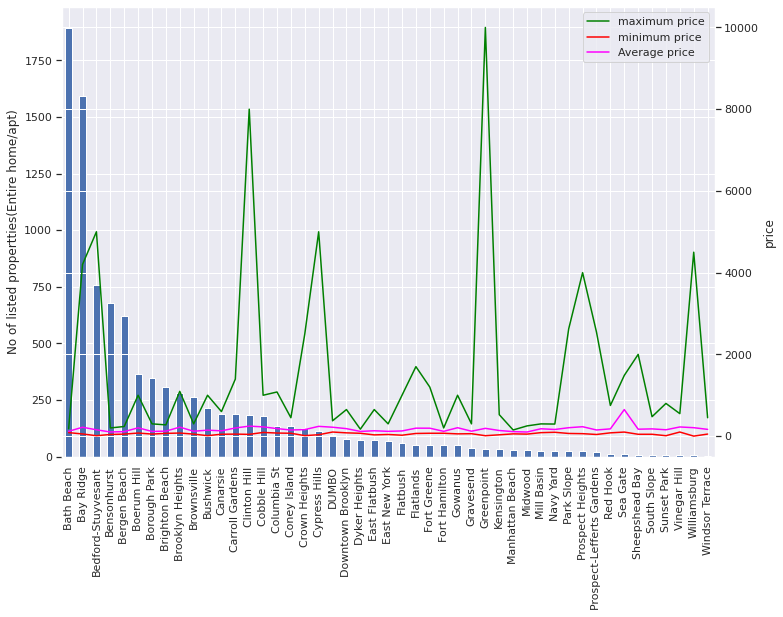

In [91]:
b_apt_room = brooklyn_data[brooklyn_data['room_type']=='Entire home/apt']
man_ax1 =b_apt_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(Entire home/apt)')

ax2 = man_ax1.twinx() # create axis 2 for prrice listing
sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=b_apt_room.groupby(['neighbourhood'])['price'].max().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=b_apt_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Average price',
             data=b_apt_room.groupby(['neighbourhood'])['price'].mean().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()

find out number of airbnb acomodation facility at neighboorhood of **Brooklyn** depend on room type **shared room**

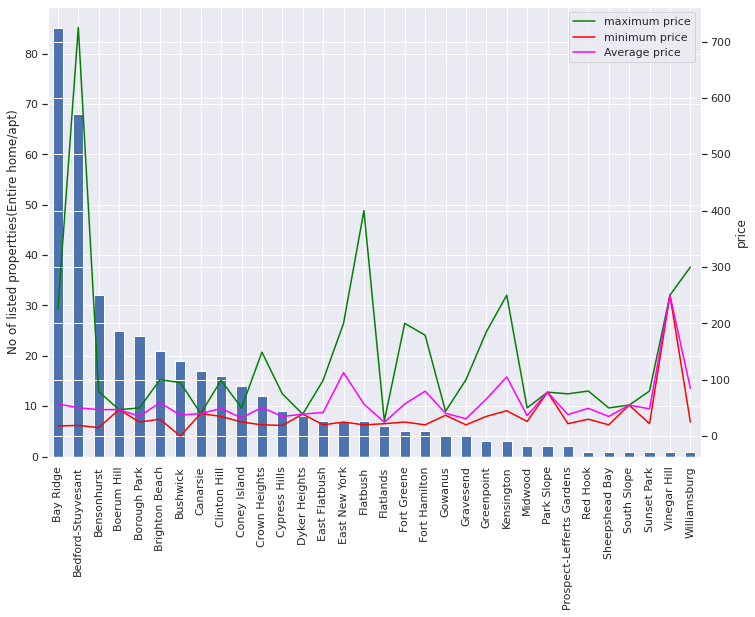

In [92]:
b_apt_room = brooklyn_data[brooklyn_data['room_type']=='Shared room']
bro_ax1 =b_apt_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(Entire home/apt)')

ax2 = bro_ax1.twinx() # create axis 2 for prrice listing
sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=b_apt_room.groupby(['neighbourhood'])['price'].max().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=b_apt_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Average price',
             data=b_apt_room.groupby(['neighbourhood'])['price'].mean().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()

find out number of airbnb acomodation facility at neighboorhood of **Queens** 

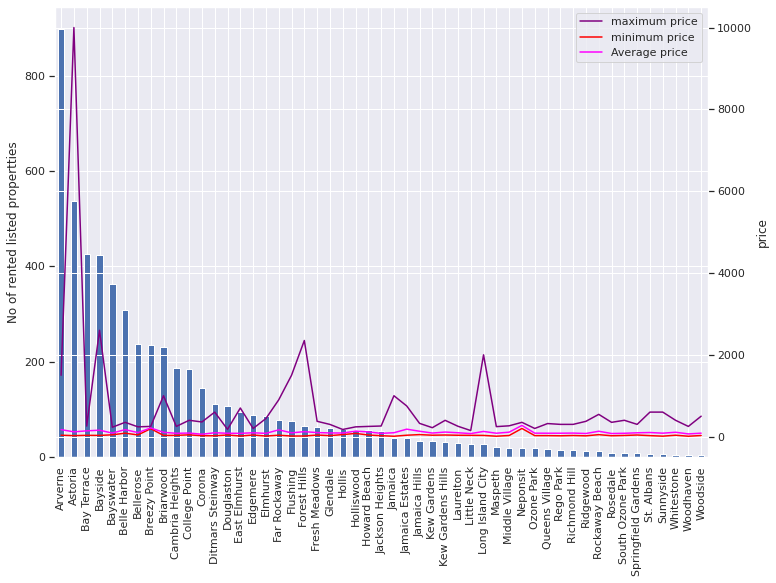

In [76]:
Queens_data = df[df['neighbourhood_group'] == 'Queens']
sns.set(rc={'figure.figsize':(11.7,8.27)})
que_ax1 = Queens_data['neighbourhood'].value_counts().plot(kind="bar",
                                              ylabel='No of rented listed propertties')

ax2 = que_ax1.twinx() # create axis 2 for prrice listing
sns.lineplot(x='neighbourhood', 
             y='price',
             color='purple',
             label='maximum price',
             data=nei_max[nei_max['neighbourhood_group' ]== 'Queens'])
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=nei_min[nei_min['neighbourhood_group' ]== 'Queens'])
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Average price',
             data=nei_avg[nei_avg['neighbourhood_group' ]== 'Queens'])
plt.legend(loc='upper right') #set legend position
plt.show()

find out number of airbnb acomodation facility at neighboorhood of **Bronx** 

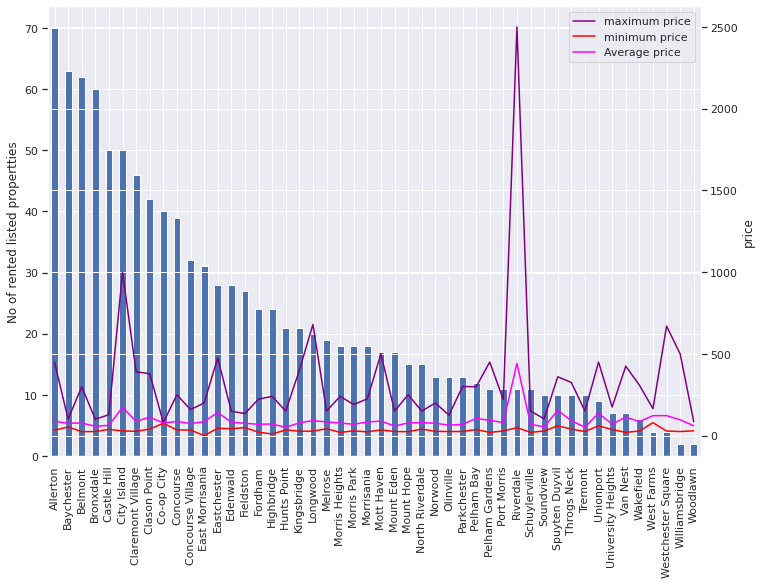

In [75]:
bronx_data = df[df['neighbourhood_group'] == 'Bronx']
bro_ax1 = bronx_data['neighbourhood'].value_counts().plot(kind="bar",
                                                          ylabel='No of rented listed propertties')
ax2 = bro_ax1.twinx() # create axis 2 for prrice listing
sns.lineplot(x='neighbourhood', 
             y='price',
             color='purple',
             label='maximum price',
             data=nei_max[nei_max['neighbourhood_group' ]== 'Bronx'])
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=nei_min[nei_min['neighbourhood_group' ]== 'Bronx'])
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Average price',
             data=nei_avg[nei_avg['neighbourhood_group' ]== 'Bronx'])
plt.legend(loc='upper right') #set legend position
plt.show()

find out number of airbnb acomodation facility at neighboorhood of **Staten Island** 

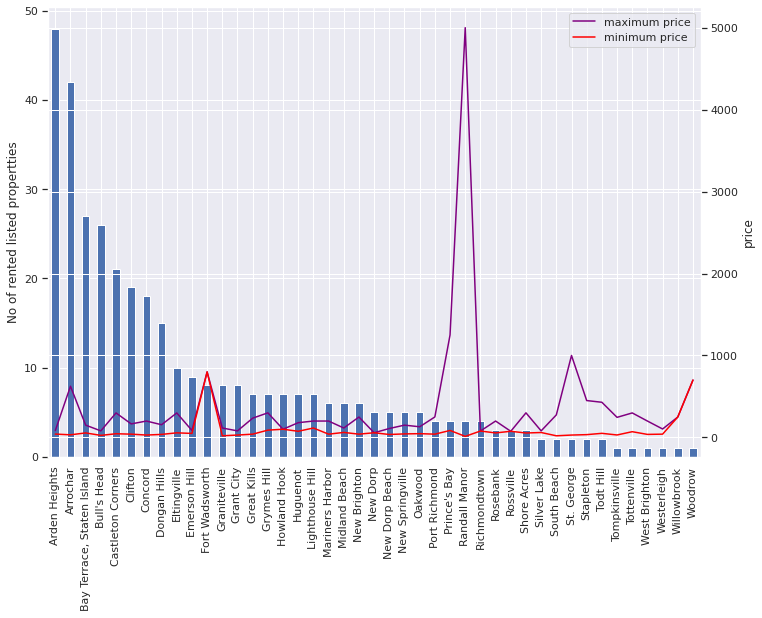

In [ ]:
staten_is_data = df[df['neighbourhood_group'] == 'Staten Island']

sta_ax1 = staten_is_data['neighbourhood'].value_counts().plot(kind="bar",
                                              ylabel='No of rented listed propertties')
ax2 = sta_ax1.twinx() # create axis 2 for prrice listing
sns.lineplot(x='neighbourhood', 
             y='price',
             color='purple',
             label='maximum price',
             data=nei_max[nei_max['neighbourhood_group' ]== 'Staten Island'])
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=nei_min[nei_min['neighbourhood_group' ]== 'Staten Island'])
plt.legend(loc='upper right') #set legend position
plt.show()

In [7]:
#df.groupby(['availability_365','reviews_per_month']) and df['availability_365'>= 100]
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
av_365 = df.loc[~((df['availability_365'] <= 200) | (df['calculated_host_listings_count']<=50)| (df['reviews_per_month'] == 0))].reset_index()
av_365=av_365.groupby(["host_id",'host_name','calculated_host_listings_count'],as_index=False)['reviews_per_month','availability_365'].mean()
av_365

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


,host_id,host_name,calculated_host_listings_count,reviews_per_month,availability_365
0,1475015,Mike,52,0.088780,340.341463
1,7503643,Vida,52,0.099535,328.744186
2,12243051,Sonder,96,0.304074,306.000000
3,16098958,Jeremy & Laura,96,0.122456,309.912281
4,22541573,Ken,87,0.113333,337.111111
5,30283594,Kara,121,0.091111,345.555556
6,61391963,Corporate Housing,91,0.297255,313.039216
7,107434423,Blueground,232,0.216667,295.041667
8,137358866,Kazuya,103,0.443684,241.473684
9,200380610,Pranjal,65,1.000000,342.000000


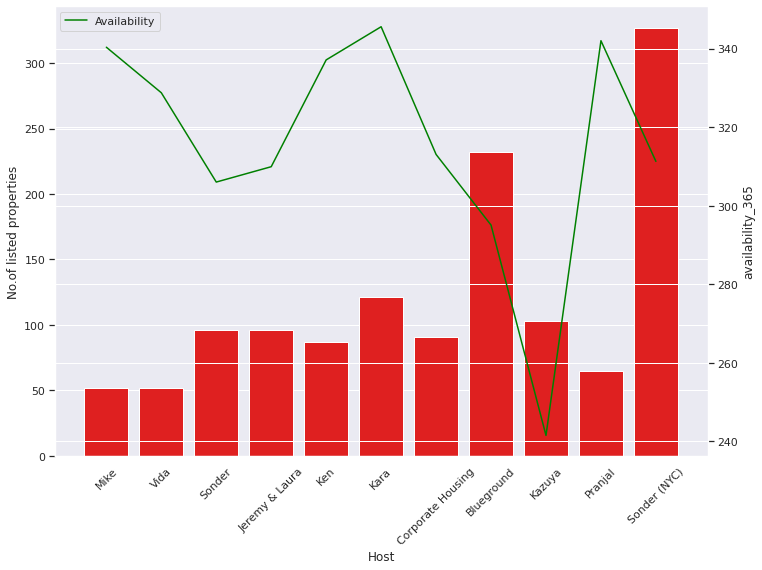

In [45]:

sns.set(rc={'figure.figsize':(11.7,8.27)}) #set figure size
ax_ava = sns.barplot(x="host_name",
                 y="calculated_host_listings_count", 
                 data=av_365,color="red")

ax_ava.set(ylabel="No.of listed properties",
           xlabel="Host")
plt.xticks(rotation=45)

ax2_ava = ax_ava.twinx() # create axis 2 for prrice listing
ax2_ava = sns.lineplot(x='host_name', 
             y='availability_365',
             color='green',
             label='Availability',
             data=av_365)
ax2_ava.legend(ncol=2, 
               loc="upper left")
plt.show()

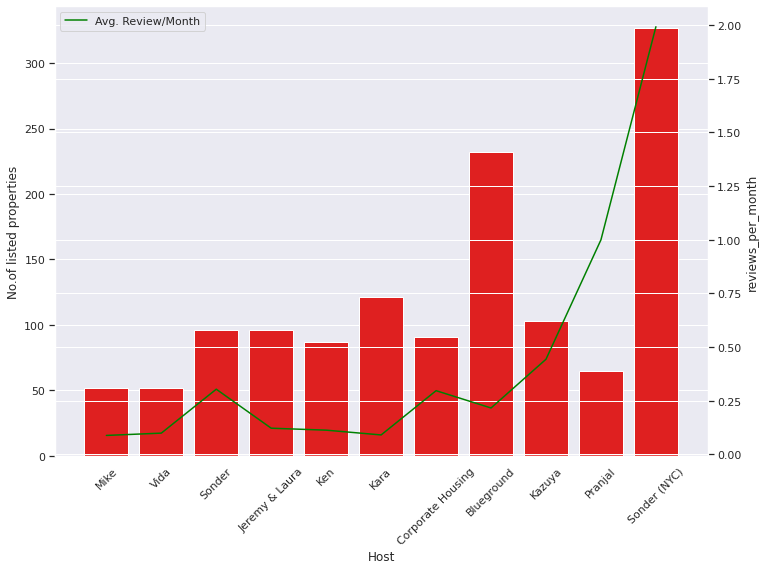

In [50]:
sns.set(rc={'figure.figsize':(11.7,8.27)}) #set figure size
ax_rev = sns.barplot(x="host_name",
                 y="calculated_host_listings_count",
                 data=av_365,color="red")
plt.xticks(rotation=45)

ax_rev.set(ylabel="No.of listed properties",
       xlabel="Host")
ax2_rev = ax_rev.twinx() # create axis 2 for reviews_per_month

ax2_rev = sns.lineplot(x='host_name', 
             y='reviews_per_month',
             color='green',
             label='Avg. Review/Month',
             data=av_365)
ax2_rev.legend(ncol=2, loc="upper left")
plt.show()